<a href="https://colab.research.google.com/github/you444Mo/Python-Projects/blob/main/GEN_BUS_657_Assignment_3_High_Quality_Wine_via_Classification_Tree_Moreimi_Zachary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identifying High Quality via Classification Tree

**Objective:**

You are put in charge of figuring out high-quality wines that are "out of the ordinary" for the head purchaser.

Proceed as follows:

* Use the same setup and the same split of the data as we did in Module 8 of GB 656
* Fit a Classification Tree to the data set, do some mild tuning.
* Use the test set, determine the confusion matrix for a 50% threshold.
* Use the test set, produce an ROC curve using the test set for your classifier. What is the AUCs?
* Compare the results to the logistic regression we used in GB 656. Use the logistic regression model whose hyperparameters were selected via cross-validation in GB 656.

### Import Needed Packages/Data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import graphviz
import pydot
from io import StringIO

### Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
### Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,  roc_auc_score

In [ ]:
### Create Clone of github repository in google for usage
!git clone https://github.com/danielbauer1979/MSDIA_PredictiveModelingAndMachineLearning.git

fatal: destination path 'MSDIA_PredictiveModelingAndMachineLearning' already exists and is not an empty directory.


In [ ]:
### Read Data Into Df
Wines = pd.read_csv('/content/MSDIA_PredictiveModelingAndMachineLearning/GB886_VIII_4_winequality.csv')

In [ ]:
### View Wine Data
Wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### EDA

In [ ]:
### Data Dimensions
Wines.shape

(1599, 12)

In [ ]:
### Data Types
Wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
### Data Stats
Wines.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
### Check for nulls
Wines.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


No Null Entries

In [ ]:
### Check for duped records
Wines[Wines.duplicated]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


240 duped records

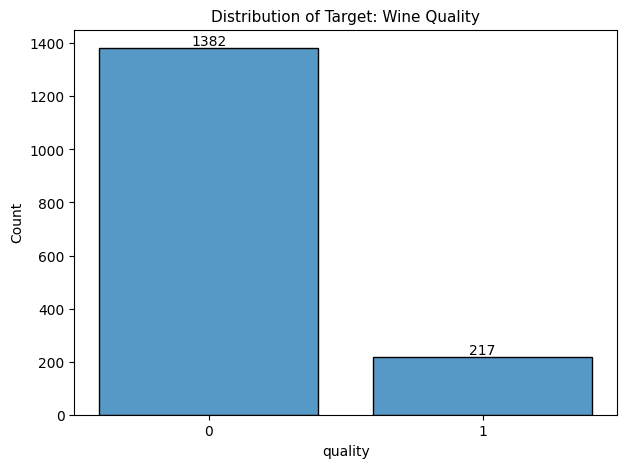

In [ ]:
### Check Distribution of Target
plt.figure(figsize = (7,5))

y = sns.histplot(
    data = Wines,
    x = 'quality',
    binrange= (np.min(Wines['quality']) - 0.5, np.max(Wines['quality']) + 0.5),
    binwidth= 1,
    shrink = 0.8
)

plt.bar_label(y.containers[0], fontsize = 10)

plt.xticks([0,1])
plt.title("Distribution of Target: Wine Quality", fontsize = 11)
plt.show()

Data is skewed towards the negative class. Will look at sklearn class_weigth parameter later to account for imbalanced class.

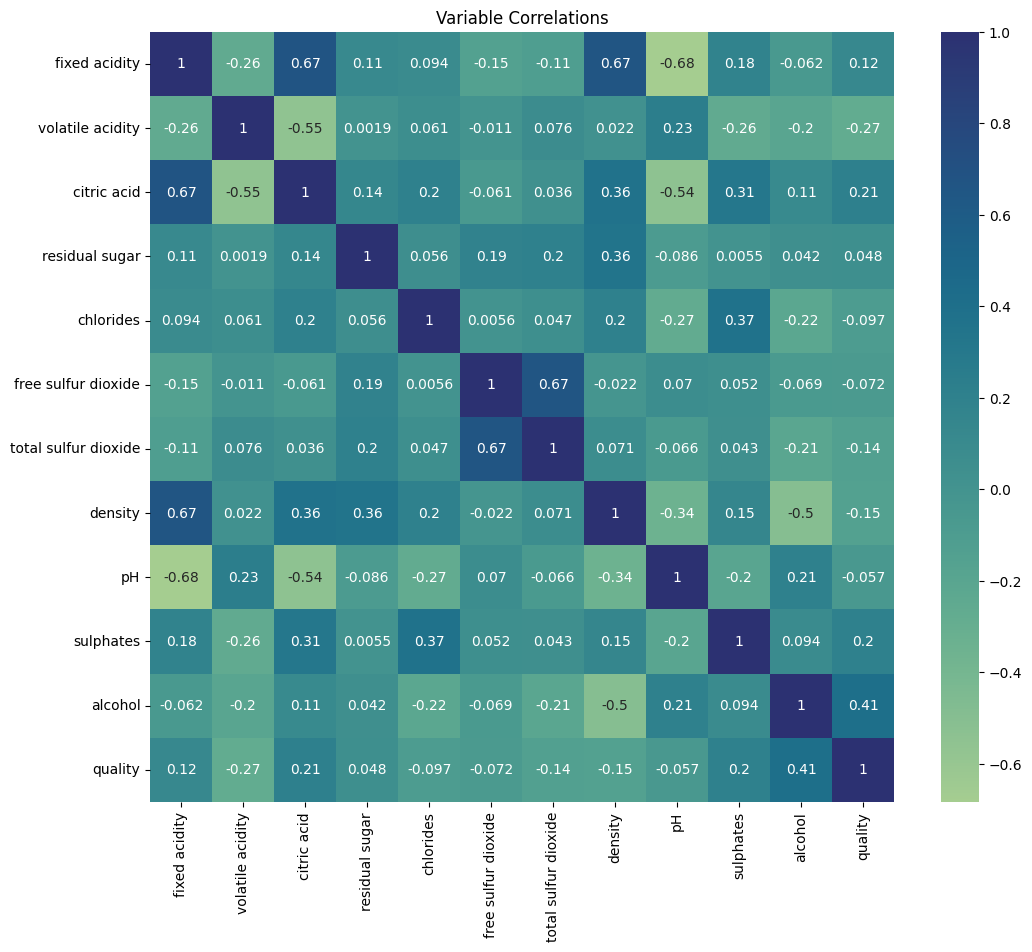

In [ ]:
### Variable Correlations
plt.figure(figsize = (12,10))

sns.heatmap(
    data = Wines.corr(),
    annot = True,
    cmap= 'crest'
    )

plt.title("Variable Correlations", fontsize = 12)
plt.show()

Fair amount of correlations amongst the features. No coefficients represent near perfect or perfect correlation.

/tmp/ipython-input-2714479854.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.regplot(x=feature, y='quality', data=Wines, x_bins=10, scatter_kws={'s': Wines.groupby(pd.cut(Wines[feature], bins=10))['quality'].count()}, ax=axes[i])


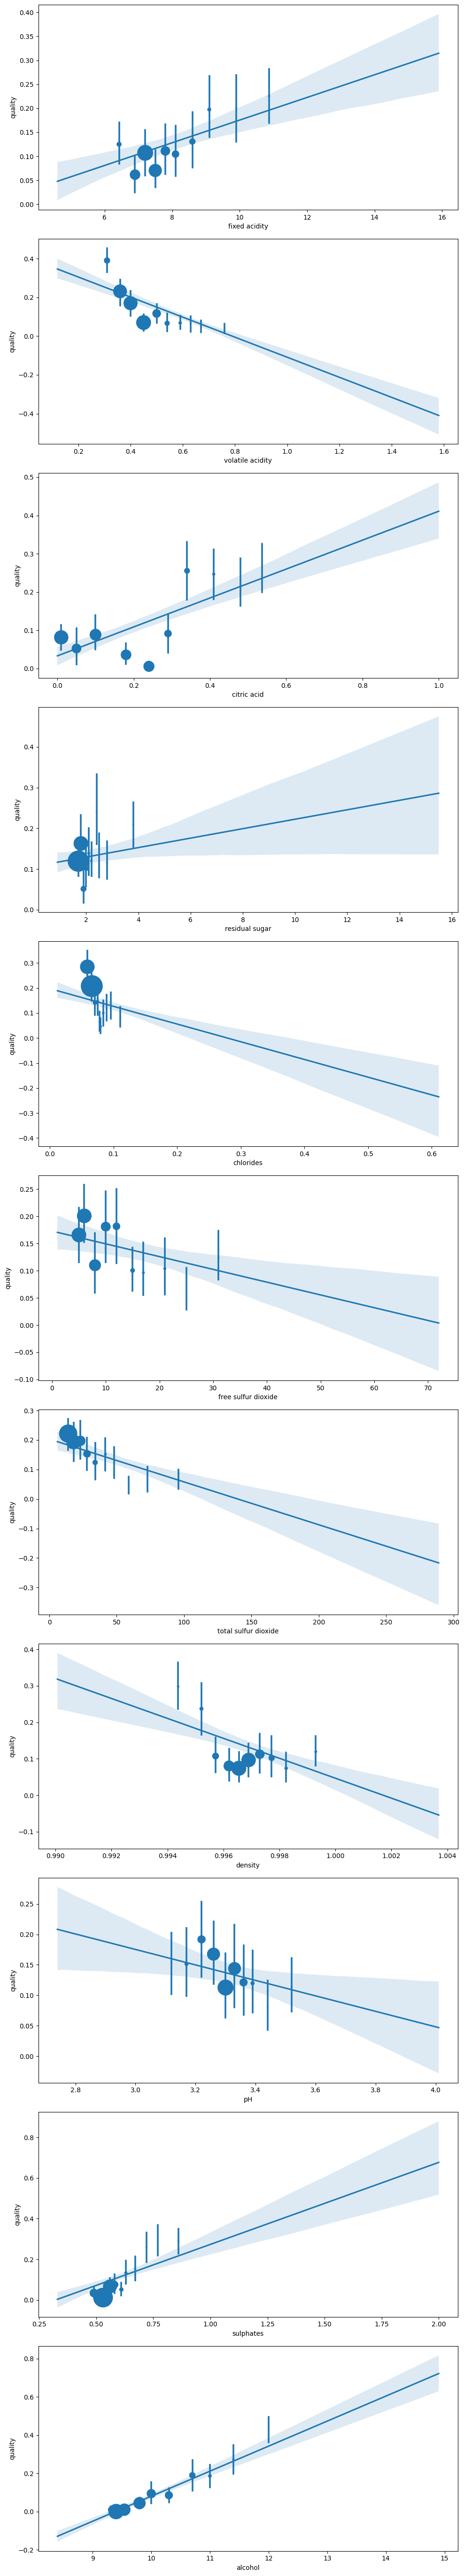

In [ ]:
### regplot to iterate through each feature/target pairing to check for type of relationship
features = Wines.columns.values[:-1]
fig, axes = plt.subplots(len(features), 1, figsize=(10, 5*len(features)))
for i, feature in enumerate(features):
  sns.regplot(x=feature, y='quality', data=Wines, x_bins=10, scatter_kws={'s': Wines.groupby(pd.cut(Wines[feature], bins=10))['quality'].count()}, ax=axes[i])
plt.tight_layout()
plt.show()

### Prep for Modeling: Logisitic Regression and Classification Tree

In [ ]:
### Retain same feature engineering/setup from GB656 module
Wines['volatile acidity squared'] = Wines['volatile acidity'] ** 2
Wines['sulphates squared'] = Wines['sulphates'] ** 2
Wines['sulphates cubed'] = Wines['sulphates'] ** 3
Wines['chlorides squared'] = Wines['chlorides'] ** 2
Wines['density squared'] = Wines['density'] ** 2
Wines['citric acid squared'] = Wines['citric acid'] ** 2
Wines['alcohol x sulphates'] = Wines['alcohol'] * Wines['sulphates']
Wines['alcohol x sulphates squared'] = Wines['alcohol'] * Wines['sulphates'] ** 2

In [ ]:
### View Updated DF
Wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,volatile acidity squared,sulphates squared,sulphates cubed,chlorides squared,density squared,citric acid squared,alcohol x sulphates,alcohol x sulphates squared
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.4900,0.3136,0.175616,0.005776,0.995605,0.0000,5.264,2.94784
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0.7744,0.4624,0.314432,0.009604,0.993610,0.0000,6.664,4.53152
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0.5776,0.4225,0.274625,0.008464,0.994009,0.0016,6.370,4.14050
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0.0784,0.3364,0.195112,0.005625,0.996004,0.3136,5.684,3.29672
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0.4900,0.3136,0.175616,0.005776,0.995605,0.0000,5.264,2.94784


In [ ]:
### Split data between train and test
train_data, test_data = train_test_split(Wines, test_size=0.25, random_state = 42)

### Lasso Logistic Model:

In [ ]:
### Create Training and Testing X,Y DFs
X_train = train_data.drop('quality', axis=1)
y_train = train_data['quality']
X_test = test_data.drop('quality', axis=1)
y_test = test_data['quality']

In [ ]:
### Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# L1 regularization with cross-validation
model_l1 = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear', max_iter=30000)
model_l1.fit(X_train_scaled, y_train)

# Print best C value (inverse of regularization strength)
print("Best C:", model_l1.C_)
print("Coefficients:\n", model_l1.coef_)

Best C: [21.5443469]
Coefficients:
 [[ 0.24830917 -1.28676684 -0.85007941  0.31596825 -0.51947816  0.
  -0.44418254 -0.45148495 -0.24231301  2.13767785  0.56762045  0.86787025
   0.         -2.55511297  0.34565256 -0.01488151  0.77254667  0.87236425
  -0.87272572]]


In [ ]:
### Display features who's coefficients were zeroed out by the L1 Penalty
zero_coef_features = X_train.columns[model_l1.coef_[0] == 0]
print("Features with zero coefficients:", zero_coef_features)

Features with zero coefficients: Index(['free sulfur dioxide', 'sulphates squared'], dtype='object')


In [ ]:
### Show Major Evaluation KPIs (50% Threshold)
y_pred_l1 = model_l1.predict_proba(X_test_scaled)[:,1]
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1 > 0.5)
print("Confusion Matrix (L1) - 50% Cuttoff Threshold:\n", conf_matrix_l1)

misclassification_rate_l1 = (conf_matrix_l1[0, 1] + conf_matrix_l1[1, 0]) / np.sum(conf_matrix_l1)
fp_rate_l1 = conf_matrix_l1[0, 1] / (conf_matrix_l1[1, 1] + conf_matrix_l1[0, 1])
fn_rate_l1 = conf_matrix_l1[1, 0] / (conf_matrix_l1[1, 0] + conf_matrix_l1[0, 0])
precision_l1 = conf_matrix_l1[1,1] / (conf_matrix_l1[1, 1] + conf_matrix_l1[0, 1])

print(f"\nMisclassification Rate: {misclassification_rate_l1:.4f}")
print(f"False Positive Rate: {fp_rate_l1:.4f}")
print(f"False Negative Rate: {fn_rate_l1:.4f}")
print(f"Precision: {precision_l1:.4f}")

Confusion Matrix (L1) - 50% Cuttoff Threshold:
 [[335  12]
 [ 39  14]]

Misclassification Rate: 0.1275
False Positive Rate: 0.4615
False Negative Rate: 0.1043
Precision: 0.5385


 Generally does decent job at classifying quality wines at the 50% cuttoff threshold, although a bit ambitious in its abilities to classify the positive class (as seen by a false positive rate (Type 1 error) of 46.15%.

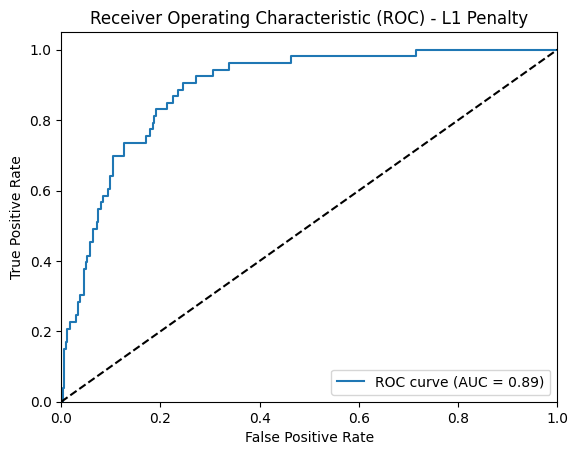

In [ ]:
# ROC and AUC
y_pred_proba_l1 = model_l1.predict_proba(X_test_scaled)[:, 1]
fpr_l1, tpr_l1, _ = roc_curve(y_test, y_pred_proba_l1)
auc_l1 = roc_auc_score(y_test, y_pred_proba_l1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_l1, tpr_l1, label='ROC curve (AUC = {:.2f})'.format(auc_l1))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - L1 Penalty')
plt.legend(loc="lower right")
plt.show()

AUC of 0.89. Model does a good job at distinguising between the positive and negative classes.

### Classification Tree Model:

In [ ]:
import pydot
from IPython.display import Image
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

#### Initial Simple Tree + Large Tree:

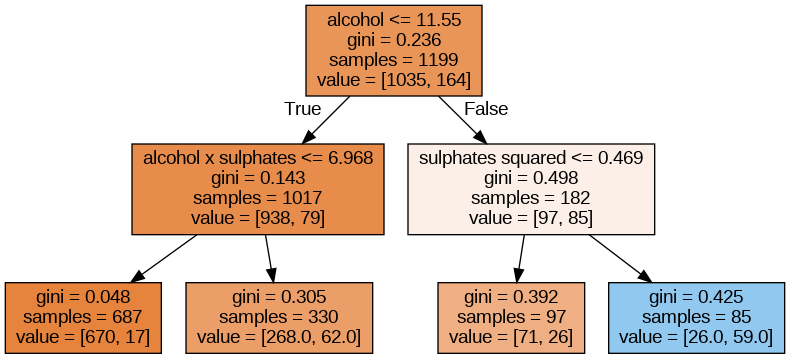

In [ ]:
### Setting up tree using default parameters & 4 nodes
Wines.quality = Wines.quality== 1
Wines_Tree_First = DecisionTreeClassifier(max_leaf_nodes=4)
Wines_Tree_First.fit(X_train, y_train)
graph, = print_tree(Wines_Tree_First, features=X_train.columns)
Image(graph.create_png())

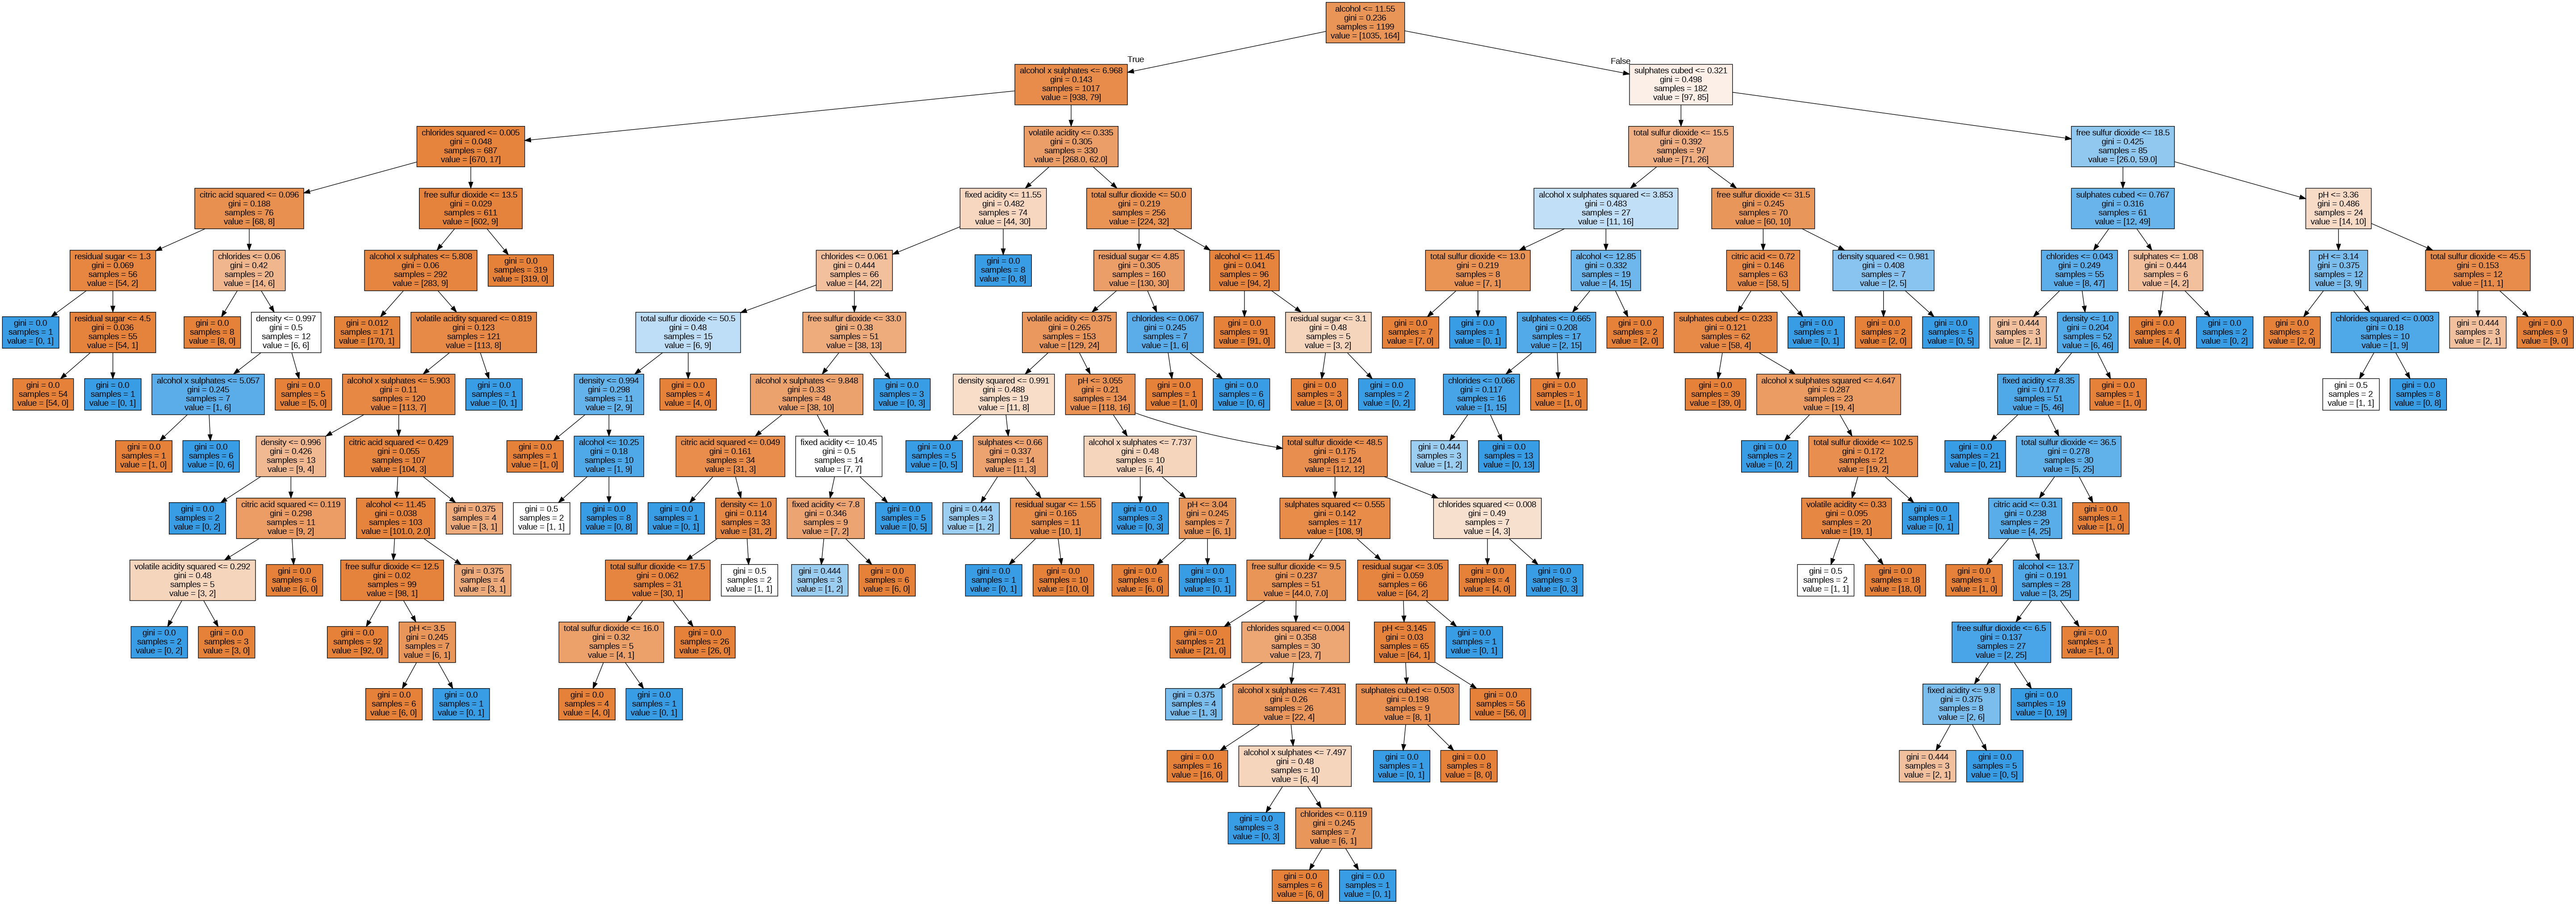

In [ ]:
### Larger Tree using smaller min_impurity_decrease
Wine_Tree = DecisionTreeClassifier(min_samples_split=5,min_impurity_decrease=0.0001)
Wine_Tree.fit(X_train, y_train)
graph, = print_tree(Wine_Tree, features=X_train.columns)
Image(graph.create_png())

In [ ]:
### Total Node in Large Tree
Wine_Tree.tree_.node_count

173

In [ ]:
### Total number of quality wine predictions
yhat = Wine_Tree.predict_proba(X_test)[:,1] ### Only grab positive class
np.sum(yhat == 1)

np.int64(47)

In [ ]:
### Confusion Matrix of large tree
conf_matrix = confusion_matrix(y_test, yhat > 0.5)

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix,
                             index=['Actual No', 'Actual Yes'],
                             columns=['Predicted No', 'Predicted Yes'])
print(f'Confusion Matrix - 50% Cuttoff:\n {conf_matrix_df}')

Confusion Matrix - 50% Cuttoff:
             Predicted No  Predicted Yes
Actual No            322             25
Actual Yes            28             25


In [ ]:
### Evaluation Metrics of large tree confusion matrix
misclassification_rate_largetree = (conf_matrix[0, 1] + conf_matrix[1, 0]) / np.sum(conf_matrix)
fp_rate_largetree = conf_matrix[0, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
fn_rate_largetree = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[0, 0])
precision_largetree = conf_matrix[1,1]/(conf_matrix[1,1] + conf_matrix[0,1])

print(f"Misclassification Rate: {misclassification_rate_largetree:.4f}")
print(f"False Positive Rate: {fp_rate_largetree:.4f}")
print(f"False Negative Rate: {fn_rate_largetree:.4f}")
print(f"Precision: {precision_largetree:.4f}")

Misclassification Rate: 0.1325
False Positive Rate: 0.5000
False Negative Rate: 0.0800
Precision: 0.5000


Metrics across the board are worse than that of the logistic lasso regression. Perhaps the most aggregious the drop in precision: (0.4615 vs 0.5385 in the lasso model).

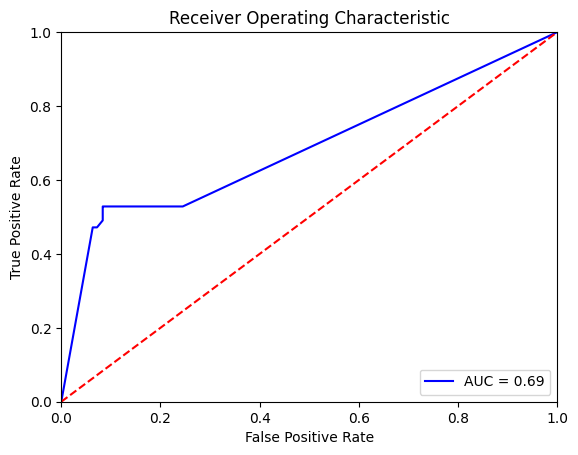

In [ ]:
### ROC Curve
y_pred_tree = Wine_Tree.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test, y_pred_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The model's ability to distinguish between the classes is quite mediocre. The large tree in this case is definetly overfitting our data. We will attempt a pruning method to find the best balance between bias and variance.

#### Pruning Approach/Tuning:

In [ ]:
### Cost Complexity Tuning
path = Wine_Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#### Using Pruning Approach to find the optimal Tree
best_alpha = 0
best_auc = 0
all_alphas = []
all_aucs = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(min_samples_split=5, min_impurity_decrease=0.0001, ccp_alpha=alpha, class_weight= 'balanced') ### Apply class_weight here to handle imbalanced target classes
    tree.fit(X_train, y_train)

    y_pred_tree = tree.predict_proba(X_test)[:,1]
    # y_pred_tree = Extract(y_pred_tree)
    fpr_tree, tpr_tree, threshold_tree = roc_curve(y_test,y_pred_tree)
    roc_auc_tree = auc(fpr_tree, tpr_tree)

    ### Append all alphas and AUCs to list
    all_alphas.append(alpha)
    all_aucs.append(roc_auc_tree)

    ### Isolate Best AUC
    if roc_auc_tree > best_auc:
        best_auc = roc_auc_tree
        best_alpha = alpha

In [ ]:
#### Create DataFrame off all alpha/AUC combos
AUC_Alpha_DF = pd.DataFrame({'ALPHA' : all_alphas, 'AUC' : all_aucs})

AUC_Alpha_DF.head()

,ALPHA,AUC
0,0.000000,0.757354
1,0.000417,0.735903
2,0.000452,0.735632
3,0.000590,0.762193
4,0.000667,0.739737


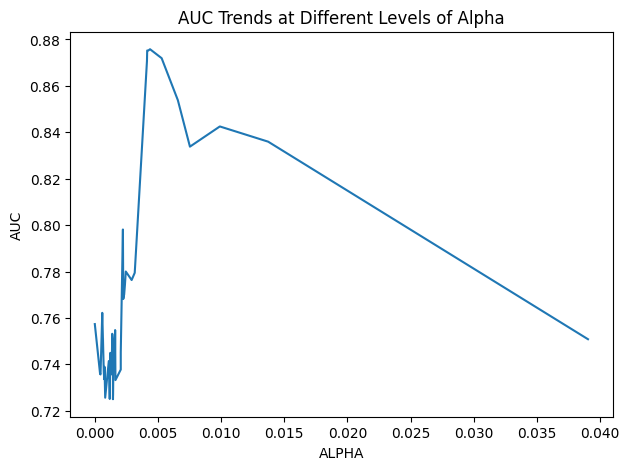

In [ ]:
### Plot of AUC vs various levels of alpha tested
plt.figure(figsize = (7,5))

sns.lineplot(
    data = AUC_Alpha_DF,
    x = 'ALPHA',
    y = 'AUC'
)

plt.title("AUC Trends at Different Levels of Alpha")

plt.show()

We can see how the AUC takes a huge nosedive at around the 0.010 alpha level.

In [ ]:
### Show best Alpha and AUC
final_tree = DecisionTreeClassifier(min_samples_split=5, min_impurity_decrease=0.0001, ccp_alpha=best_alpha, class_weight= 'balanced')
final_tree.fit(X_train, y_train)

print(f"Best ccp_alpha: {best_alpha}") ### similar to optimal alpha from lasso/ridge regression
print(f"Best AUC: {best_auc}")

Best ccp_alpha: 0.004371182564276616
Best AUC: 0.8757816323201565


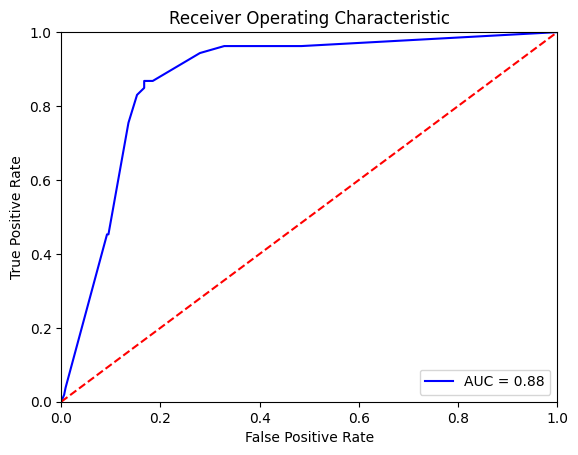

In [ ]:
# Evaluate the final model
y_pred_final = final_tree.predict_proba(X_test)[:,1] ### Only select positive Class
# y_pred_final = Extract(y_pred_final)
fpr_final, tpr_final, threshold_final = roc_curve(y_test, y_pred_final)
roc_auc_final = auc(fpr_final, tpr_final)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_final, tpr_final, 'b', label = 'AUC = %0.2f' % roc_auc_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The pruned model does a much better job at generalization, AUC is much better, and distinction between the classes is solid.

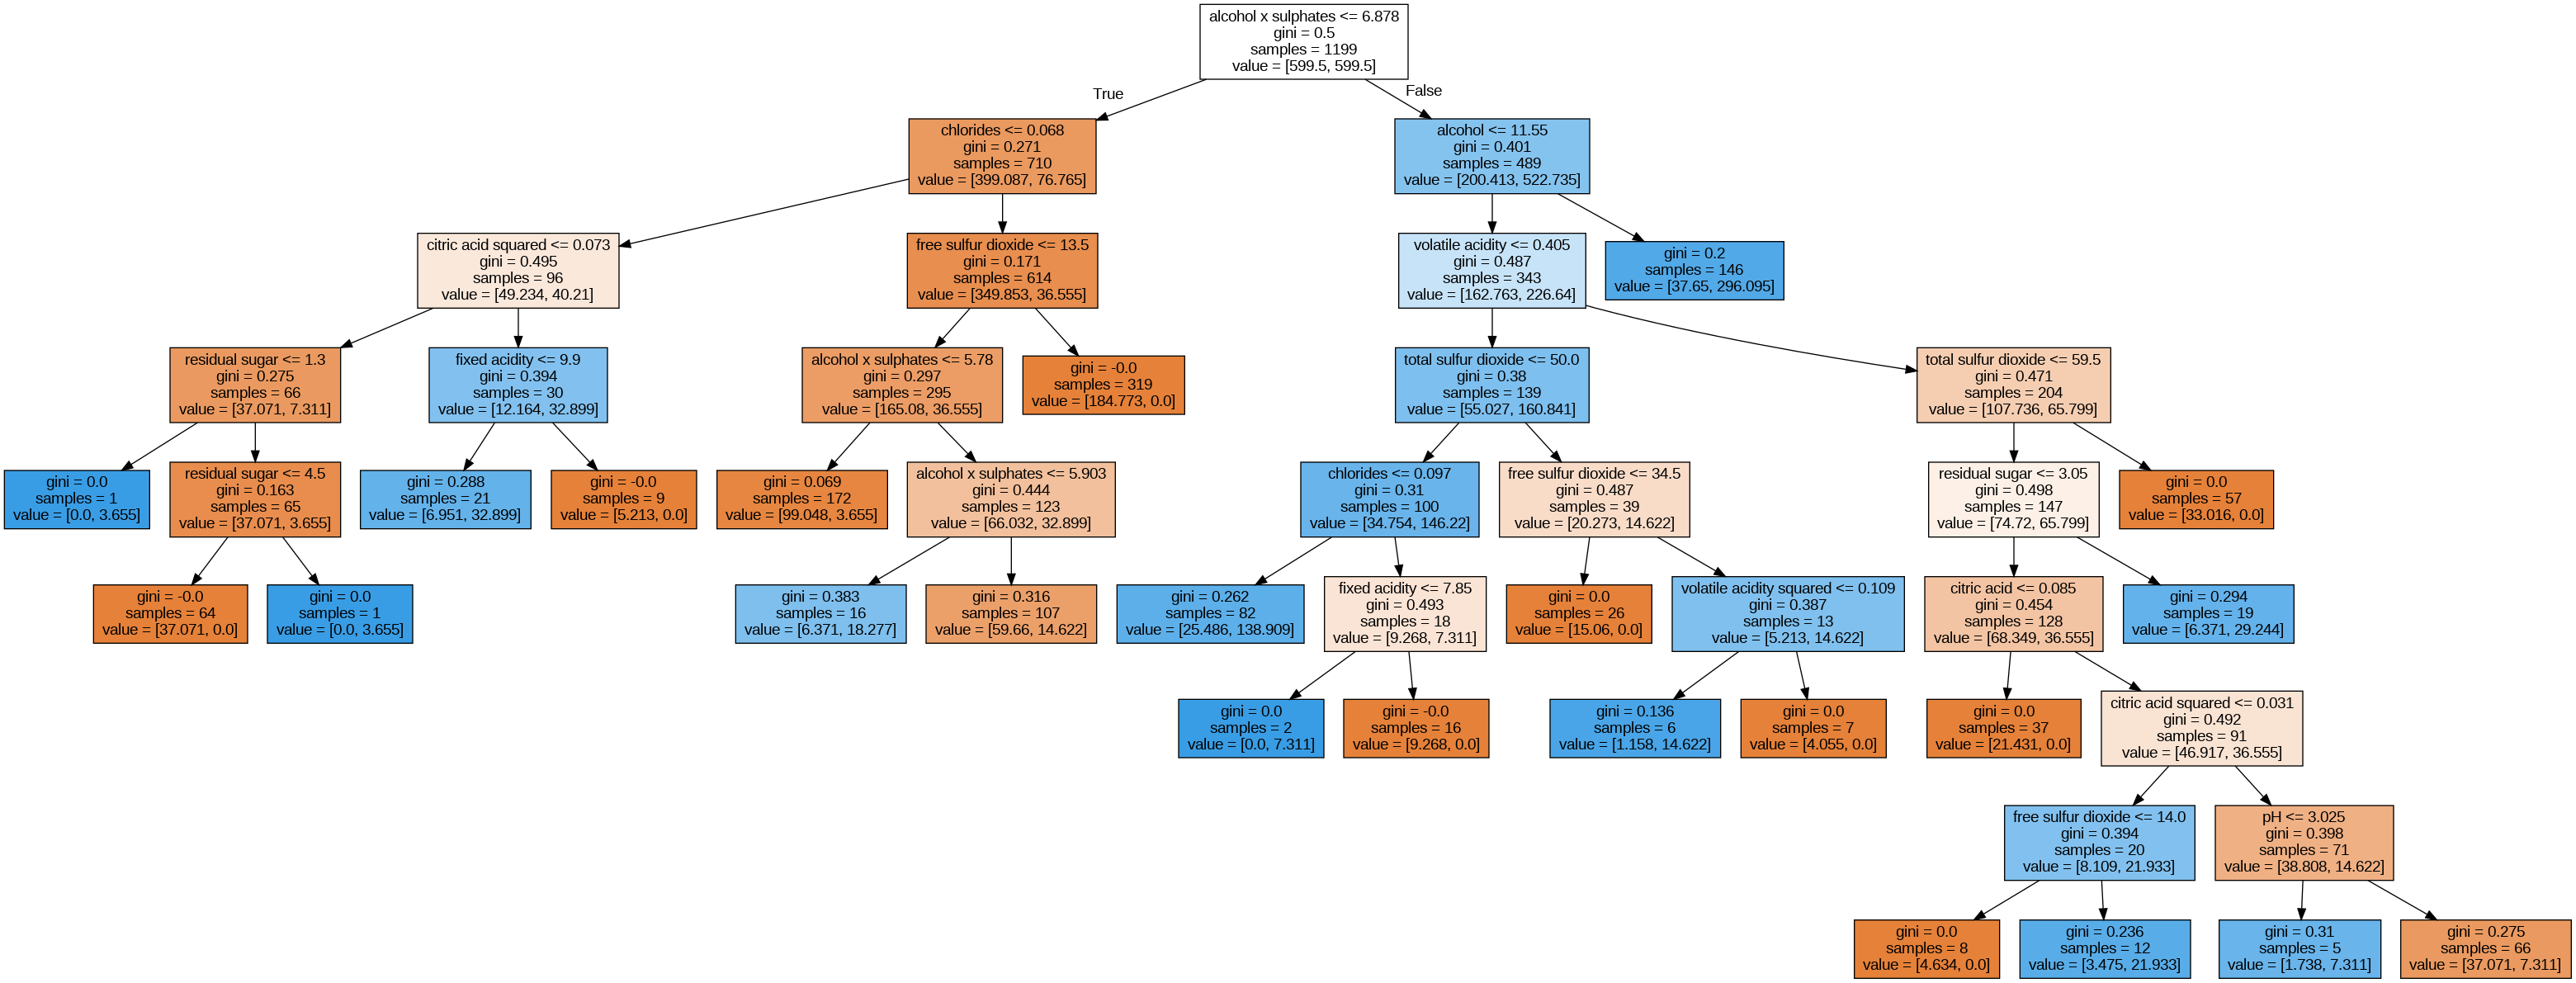

In [ ]:
### Show chart of pruned tree
graph, = print_tree(final_tree, features=X_train.columns)
Image(graph.create_png())

In [ ]:
### Total Number of Terminal Leaves in the optimal tree
print("Number of leaves:", final_tree.get_n_leaves()) ### These are the leaves that don't have anything coming after them

Number of leaves: 23


In [ ]:
### Final Confusion Matrix of Optimal Tree
y_pred_final = final_tree.predict_proba(X_test)[:,1] # Predict classes for the confusion matrix

conf_matrix_final = confusion_matrix(y_test, (y_pred_final > 0.5) )

# Create a DataFrame for better visualization
conf_matrix_final_df = pd.DataFrame(conf_matrix_final,
                             index=['Actual No', 'Actual Yes'],
                             columns=['Predicted No', 'Predicted Yes'])
conf_matrix_final_df

,Predicted No,Predicted Yes
Actual No,283,64
Actual Yes,7,46


In [ ]:
### Evaluation Metrics of optimal tree confusion matrix
misclassification_rate_finaltree = (conf_matrix_final[0, 1] + conf_matrix_final[1, 0]) / np.sum(conf_matrix_final)
fp_rate_finaltree = conf_matrix_final[0, 1] / (conf_matrix_final[1, 1] + conf_matrix_final[0, 1])
fn_rate_finaltree = conf_matrix_final[1, 0] / (conf_matrix_final[1, 0] + conf_matrix_final[0, 0])
precision_finalTree = conf_matrix_final[1,1]/(conf_matrix_final[1,1] + conf_matrix_final[0,1])

print(f"Misclassification Rate: {misclassification_rate_finaltree:.4f}")
print(f"False Positive Rate: {fp_rate_finaltree:.4f}")
print(f"False Negative Rate: {fn_rate_finaltree:.4f}")
print(f"Precision: {precision_finalTree:.4f}")

Misclassification Rate: 0.1775
False Positive Rate: 0.5818
False Negative Rate: 0.0241
Precision: 0.4182


### Overall Findings:

<u>Some General Observations:</u>

* Compared to the Lasso Logistic Model, the balanced, pruned tree has roughly the same AUC (0.88 in the tree model vs 0.89 for the lasso model). Both models do a great job of distinguishing between the positive and negative classes.

* When evaluating their respective confusion matrices, the optimal tree model is much more agressive at classifying the positive class vs that of the logistic model (110 positive labels predicted vs only 26 in the logistic model)

* The Tree model is able to correctly identify 46 actual quality wines, while the logistic model could only identify 14 correctly. With that, the tree model also wrongly classified 64 non-highquality wines as quality (FP Rate of 0.5818) while the logistic model only misclassified 12 non-quality wines (FP Rate of 0.4615). There is a tradeoff here between being able to identify more of the positive class correctly and increasing the amount of false positives.

* The False Negative rate for the Tree model actually vastly improved vs that of the logistic model (0.0241 vs 0.1043)

* General misclassification rate and precision both worsened for the tree vs the logisitic regression, but this is to be expected since the tree is  prioritizing finding more of the postive class.

